In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [2]:
# 1. 이미지 셋 불러오기

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [7]:
test_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [8]:
# 2. 이미지 전처리

# 1) 4차원으로 생성
#    - 이미지 셋 3차원: 2차원 이미지가 여러 장
#    - 이미지 픽셀마다 특성(특징)을 추출하는 처리를 하기 위한 차원 하나 더 추가
# 2) 데이터를 읽어왔을 때 픽셀마다의 값의 명암 정도만 가지고 있음(0 ~ 255)
#    - 0 ~ 1 사이로 스케일링(표준화)시켜줌
#    - 방법) 255로 나누어주면 됨
# 3) 이미지 크기는 아주 다양하므로 크기를 표준화

In [9]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [10]:
train_images.shape

(60000, 28, 28, 1)

In [11]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [12]:
# 3. 특성 추출 처리

In [13]:
model=Sequential()

In [14]:
model.add(Conv2D(32, (3,3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='sigmoid'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='sigmoid'))

In [15]:
# 4. 특성추출한 결과를 학습데이터로 넣어서 학습할 예정
#    deep modeling
#    1) 특성 추출한 이미지 데이터를 1차원으로 생성 (Flatten)
#    2) 딥러닝 심층신경망(deep MLP)
#    3) fit()

In [16]:
model.add(Flatten()) ## 입력층
model.add(Dense(64, activation='sigmoid')) ## 히든층
model.add(Dense(10, activation='softmax')) ## 출력층

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
            )

In [19]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=100)
history

Epoch 1/5
600/600 [==============================] - 17s 28ms/step - loss: 1.0506 - accuracy: 0.6560
Epoch 2/5
600/600 [==============================] - 17s 28ms/step - loss: 0.1780 - accuracy: 0.9512
Epoch 3/5
600/600 [==============================] - 17s 28ms/step - loss: 0.1071 - accuracy: 0.9694
Epoch 4/5
600/600 [==============================] - 17s 28ms/step - loss: 0.0791 - accuracy: 0.9773
Epoch 5/5
600/600 [==============================] - 17s 29ms/step - loss: 0.0646 - accuracy: 0.9812


In [20]:
# 5. 모델에 대해 평가
#    1) test 데이터를 검증 ==> overfitting 여부
#    2) 시각화로 평가

In [21]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
loss, acc

313/313 - 1s - loss: 0.0526 - accuracy: 0.9826 - 1s/epoch - 3ms/step


(0.05261243134737015, 0.9825999736785889)

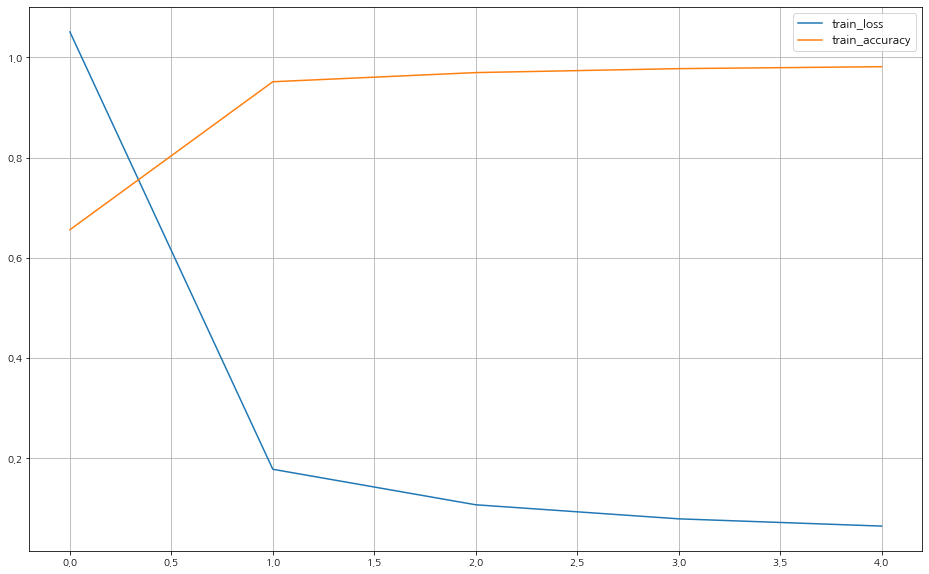

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['train_loss', 'train_accuracy'], fontsize=12)
plt.grid()
plt.show()